In [ ]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from keras.regularizers import l2
from datetime import datetime 


# extract folder of chages disease images and non chagas disease images
## We should have two folders ( Chagas and Non-Chagas )
#!unzip "/content/drive/MyDrive/ChagasTest.zip"

#!unzip "/content/drive/MyDrive/ChagasValidation.zip"

In [ ]:
#!unzip "/content/drive/MyDrive/Non-ChagasData_Selected.zip"

In [ ]:
#!unzip "/content/drive/MyDrive/ChagasTraining.zip"


In [ ]:
import os 
import seaborn as sns
from keras.applications.vgg16 import VGG16
training_dir =  "../input/training/training"
test_dir =      "../input/testdata/Test"
validation_dir= "../input/validation/Validation"

training_dir_images = os.path.join(training_dir , "images")
test_dir_images = os.path.join(test_dir , "images")
validation_dir_images = os.path.join(validation_dir , "images")


Training_Non_ChagasFiles = [ "i_0450,i_0389,i_0392 ,i_0395 , i_0440 ,i_0429 , i_0406 , i_0398 , i_0369 , i_0374, i_0348, i_0339,  i_0337 , i_0389 ,i_0334, i_0324 ,i_0279, i_0280, i_0281 , i_0263 , i_0264 , i_0254 , i_0253 , i_0245 , i_0240 , i_0238 , i_0235 , i_0226 , i_0201, i_0184, i_0156, i_0150, i_0148 , i_0152 , i_0099 , i_0018 , i_0001" ]


Validation_Non_ChagasFiles = ["i842 , i806 , i_0583, i_0559 , i_0528 , i_0529 , i_0583 , i_0559 , i_0528 , i_0529 , i_0481, i_0394 , i_0183 , i_0078 , i_0042 , i_0022" ]


Test_Non_ChagasFiles = ["i_0579 , i_0579d , i_0050dd , i_0046d , i_0046dd , i_0047dd , i_0047d , i_0048d , i_0048dd ,i_0049d , i_0049dd , i_0050d , i_0050dd" ]

Non_chagas_files_names = []

Non_chagas_files_names.extend(Training_Non_ChagasFiles)
Non_chagas_files_names.extend(Validation_Non_ChagasFiles)
Non_chagas_files_names.extend(Test_Non_ChagasFiles)

NC = []
for string in Non_chagas_files_names:
  
  NC.extend(string.split(","))

Non_Chagas_Files = []
for values in NC:
  Non_Chagas_Files.append(values.strip())




In [ ]:
training_dir_images

In [ ]:
import cv2
from skimage import io


###Extract the Each Image and Label them as 0 or 1  ( label the chagas images as 1 and non chagas as 0)
# we can have seperate list(or any array) for each of them[images and their corresponding labels ] ( one containing the arrays representing Each Image and another containing values/labels )

labels = []
images = []
file_name= []
for file in os.listdir(training_dir_images):
  if file.endswith(".png"):
      
    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      
      images.append(cv2.resize(cv2.imread(os.path.join(training_dir_images , file)), (256, 256)))
      
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(training_dir_images , file)), (256, 256)))

  else:
    pass

for file in os.listdir(test_dir_images):
  if file.endswith(".png"):


    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      images.append(cv2.resize(cv2.imread(os.path.join(test_dir_images , file)), (256, 256)))
      
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(test_dir_images , file)), (256, 256)))
  
  else:
    pass


for file in os.listdir(validation_dir_images):
  if file.endswith(".png"):
    

    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      images.append(cv2.resize(cv2.imread(os.path.join(validation_dir_images , file)), (256, 256)))
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(validation_dir_images , file)), (256, 256)))
  else:
    pass
# Where X is Array containing Arrays( representing Images)
# Where Y is Array containing Labels(values as 0 and 1 ) ( representing labels for each Image)



In [ ]:
for file_path in os.listdir("../input/non-chagas/Non-ChagasData_Selected"):
  if file_path.endswith(".png"):
    labels.append(0)
      
    images.append(cv2.resize(cv2.imread(os.path.join("../input/non-chagas/Non-ChagasData_Selected" , file_path)), (256, 256)))

In [ ]:
import numpy as np
np.unique(np.array(labels) ,return_counts = True )

(array([0, 1]), array([559, 940]))

In [ ]:
#imagess = []
#for imagesss in images:
#  imagess.append(cv2.resize(imagesss , (256 , 256 )))

In [ ]:

# Split the Images and labels into Train , Test and Validation Data
print(type(images))
images = np.array(images , dtype = "float32")
labels = np.array(labels, dtype = 'int32')
print(type(images))


<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
print(images.shape[0])
print(labels.shape[0])


1499
1499


In [ ]:
import random

# Shuffle
from sklearn.utils import shuffle
#images, labels = shuffle(images, labels, random_state=10)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2 , random_state=10)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5 , random_state=10)



In [ ]:
test_labels

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

In [ ]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 1199
Number of validation examples: 150
Number of testing examples: 150
Training images are of shape: (1199, 256, 256, 3)
Training labels are of shape: (1199,)
Validation images are of shape: (150, 256, 256, 3)
Validation labels are of shape: (150,)
Test images are of shape: (150, 256, 256, 3)
Test labels are of shape: (150,)


In [ ]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

In [ ]:
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Reshape, Permute, Activation, Input, \
    add, multiply ,  Dense, Conv2D, Activation, Flatten
from keras.layers import concatenate, core, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.layers.core import Lambda
#import keras.backend as K
from keras.layers import Input, Conv2D, UpSampling2D, BatchNormalization, Activation, add,average,concatenate , Conv2DTranspose
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
#%tensorflow_version 1.x
from keras.callbacks import TensorBoard
from keras.callbacks import CSVLogger
from glob import glob
from sklearn.model_selection import train_test_split


import keras
import tensorflow as tf
#import keras.backend.tensorflow_backend as K
import keras.backend as K
import matplotlib.pyplot as plt

import tensorflow as tf
import cv2


import numpy as np



In [ ]:

from keras.models import Sequential, Model 
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 

from sklearn.metrics import accuracy_score, confusion_matrix
from keras import backend as K
from keras.losses import binary_crossentropy
import tensorflow as tf
import os
import skimage.io as io
import skimage.transform as trans
import cv2
import warnings
warnings.filterwarnings("ignore")


## Metrics

In [ ]:


def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall


# **Data_Augmentation**

In [ ]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

# **MODEL_2**

In [ ]:
## Res2Net Model with Regularizers
IMG_SIZE = 256
h_heuns_method=0.5

def res_block(x, nb_filters, strides):
    res_path = BatchNormalization()(x)
    res_path = Activation(activation='relu')(res_path)
    res_path = Conv2D(filters=nb_filters[0], kernel_size=(3, 3), padding='same' ,strides=strides[0]  )(res_path)

    #res_path = Conv2D(filters=nb_filters[0], kernel_size=(3, 3), padding='same' ,strides=strides[0] , kernel_regularizer=l2(0.01) )(res_path)

    res_path = BatchNormalization()(res_path)
    res_path = Activation(activation='relu')(res_path)
    res_path = Conv2D(filters=nb_filters[1], kernel_size=(3, 3), padding='same',strides=strides[1] )(res_path)

    #res_path = Conv2D(filters=nb_filters[1], kernel_size=(3, 3), padding='same',strides=strides[1], kernel_regularizer=l2(0.01) )(res_path)
    hpath = Lambda(lambda x: x * h_heuns_method)(res_path)
    shortcut = Conv2D(nb_filters[1], kernel_size=(1, 1),strides=strides[0]  )(x)

    #shortcut = Conv2D(nb_filters[1], kernel_size=(1, 1),strides=strides[0] , kernel_regularizer=l2(0.01) )(x)
    shortcut = BatchNormalization()(shortcut)

    res_path = add([shortcut, hpath])#suma corta
    return res_path

def res_block2(x,y,nb_filters, strides):
    res_path = BatchNormalization()(x)
    res_path = Activation(activation='relu')(res_path)
    res_path = Conv2D(filters=nb_filters[0], kernel_size=(3, 3), padding='same' ,strides=strides[0] )(res_path)
    #res_path = Conv2D(filters=nb_filters[0], kernel_size=(3, 3), padding='same' ,strides=strides[0] , kernel_regularizer=l2(0.01) )(res_path)
    res_path = BatchNormalization()(res_path)
    res_path = Activation(activation='relu')(res_path)
    #res_path = Conv2D(filters=nb_filters[1], kernel_size=(3, 3), padding='same',strides=strides[1] , kernel_regularizer=l2(0.01) )(res_path)
    res_path = Conv2D(filters=nb_filters[1], kernel_size=(3, 3), padding='same',strides=strides[1]  )(res_path)

    hpath = Lambda(lambda x: x * h_heuns_method)(res_path)
    shortcut = Conv2D(nb_filters[1], kernel_size=(1, 1),strides=strides[0]  )(x)

    #shortcut = Conv2D(nb_filters[1], kernel_size=(1, 1),strides=strides[0] , kernel_regularizer=l2(0.01) )(x)
    shortcut = BatchNormalization()(shortcut)

    res_path = add([shortcut, hpath])#suma corta

    res_path = average([y, res_path])#suma doble 
    return res_path


def encoder(x):
    features_extracted = []

    #main_path = Conv2D(filters= 64, kernel_size=(3, 3), padding='same', strides=(1, 1) , kernel_regularizer=l2(0.01) )(x)
    main_path = Conv2D(filters= 64, kernel_size=(3, 3), padding='same', strides=(1, 1) )(x)
    main_path = BatchNormalization()(main_path)
    main_path = Activation(activation='relu')(main_path)
    
    #main_path = Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1, 1) , kernel_regularizer=l2(0.01) )(main_path)
    main_path = Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1, 1) )(main_path)
    hpath = Lambda(lambda x: x * h_heuns_method)(main_path)
    shortcut = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1)  )(x)

    #shortcut = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1) , kernel_regularizer=l2(0.01) )(x)
    shortcut = BatchNormalization()(shortcut)

    main_path = add([shortcut, hpath])#suma corta

    features_extracted.append(main_path)


    s1 = Conv2D(filters=128, kernel_size=(1, 1), strides=(2, 2) )(x)
    #s1 = Conv2D(filters=128, kernel_size=(1, 1), strides=(2, 2) , kernel_regularizer=l2(0.01))(x)

    s1 = BatchNormalization()(s1)
    s1 = Activation(activation='relu')(s1)
    s1 = Dropout(0.3)(s1)
    main_path = res_block2(main_path,s1, [128, 128], [(2, 2), (1, 1)]) 
    features_extracted.append(main_path)

    main_path = res_block(main_path, [256, 256], [(2, 2), (1, 1)])
    features_extracted.append(main_path)

    #s2 = Conv2D(filters=512, kernel_size=(1, 1), strides=(4, 4) , kernel_regularizer=l2(0.01) )(to_decoder[1])
    s2 = Conv2D(filters=512, kernel_size=(1, 1), strides=(4, 4)  )(features_extracted[1])
    s2 = BatchNormalization()(s2)
    s2 = Activation(activation='relu')(s2)
    s2 = Dropout(0.3)(s2)

    main_path = res_block2(main_path,s2, [512, 512], [(2, 2), (1, 1)])
    features_extracted.append(main_path)

    

    return features_extracted
    

def res2unet(lrate=8.00E-05,pretrained_weights=None):
    print(lrate)
    input_size=(IMG_SIZE, IMG_SIZE, 3)
    inputs = Input(shape=input_size)

    features_extracted = encoder(inputs)

    path = res_block(features_extracted[-1], [1024, 1024], [(2, 2), (1, 1)])####bridge

    # FC layer 
    x = Flatten()(path)
    #x = Dense(units = 1024 , activation = 'relu')(x)
    #x = Dropout(0.7)(x)
    x = Dense(units = 512 , activation = 'relu' , kernel_regularizer=l2(0.01) )(x)
    x = Dropout(0.7)(x)
    x = Dense(units = 128 , activation = 'relu' ,  kernel_regularizer=l2(0.01) )(x)
    x = Dropout(0.5)(x)
    x=  Dense(units = 64 , activation = 'relu' ,  kernel_regularizer=l2(0.01) )(x)
    x = Dropout(0.3)(x)



    #path = decoder(path, from_encoder=to_decoder)


    #path = Conv2D(2, kernel_size=(3, 3),activation='relu', padding='same', strides=(1, 1))(path)
    #path = Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid')(path)
    
    # Output layer
    output  = Dense(units = 1 , activation = 'sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=output )
    model.compile(optimizer=Adam(lr=lrate), loss = 'binary_crossentropy', metrics = ['accuracy',precision,recall])
    if (pretrained_weights):
        model.load_weights(pretrained_weights)
    return model
    

model2 = res2unet(lrate=7.00E-05)

model2.summary()

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=5, verbose = 1, mode='min', restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy', 
    patience = 3, 
    verbose = 1, 
    factor = 0.3, 
    min_lr = 0.000001
    )


model_checkpoint1 = keras.callbacks.ModelCheckpoint('Model_Weights2.hdf5', monitor='val_accuracy',verbose=1, mode='max',save_best_only=True)
csv_logger = CSVLogger('training_model_metrics_values.log', append=True, separator=';')




7e-05
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           batch_normalization[0][0]        
________________________________________________________________________________________

# ****Model 3****

In [ ]:
def res2unet_SepConv(lrate=8.00E-05,pretrained_weights=None):
    print(lrate)
    input_size=(IMG_SIZE, IMG_SIZE, 3)
    inputs = Input(shape=input_size)

    Feature_Extracted = encoder(inputs)

    #path = res_block(to_decoder[-1], [1024, 1024], [(2, 2), (1, 1)])####bridge
    path = SeparableConv2D(512, (3,3), activation = 'relu', padding = 'same'  )(Feature_Extracted[-1])
    path = SeparableConv2D(512, (3,3), activation = 'relu', padding = 'same'  )(path)
    path = BatchNormalization()(path)
    path = MaxPooling2D(pool_size = (2,2))(path)
    #path = Dropout(0.2)(path)


    # FC layer 
    x = Flatten()(path)
    
    x = Dense(units = 512 , activation = 'relu'  )(x)
    x = Dropout(0.7)(x)
    x = Dense(units = 128 , activation = 'relu'  )(x)
    x = Dropout(0.5)(x)
    x=  Dense(units = 64 , activation = 'relu' )(x)
    x = Dropout(0.3)(x)
    
    # Output layer
    # For dense = 1  or for binary classification, we use activation = "linear"
    output  = Dense(units = 1 ,kernel_regularizer = tf.keras.regularizers.l2(0.01), activation = 'linear')(x)
    
    model = Model(inputs=inputs, outputs=output )
    
    #model.compile(optimizer=Adam(lr=lrate), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy',precision,recall])
    # For SVM as last layer we use Different Loss Function "squared_hinge" for multi-class and "hinge" loss for binary class 
    
    model.compile(optimizer=Adam(lr=lrate), loss = 'hinge', metrics = ['accuracy',precision,recall])

    model.summary()
    if (pretrained_weights):
        model.load_weights(pretrained_weights)
    return model
    

model3 = res2unet_SepConv(lrate=7.00E-05)
#model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=5, verbose = 1, mode='min', restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy', 
    patience = 3, 
    verbose = 1, 
    factor = 0.3, 
    #min_lr = 0.000001
    )


model_checkpoint1 = keras.callbacks.ModelCheckpoint('Model_Weights3.hdf5', monitor='val_accuracy',verbose=1, mode='max',save_best_only=True)
csv_logger = CSVLogger('training_model_metrics_values.log', append=True, separator=';')



7e-05
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 256, 256, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 256, 256, 64) 256         conv2d_17[0][0]                  
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 256, 256, 64) 0           batch_normalization_16[0][0]     
______________________________________________________________________________________

In [ ]:
history3 = model3.fit(
    train_images, 
    train_labels, 
    batch_size = 2, 
    epochs = 50, 
    validation_data=(val_images, val_labels), 
    callbacks=[ model_checkpoint1 ,csv_logger  ])

Epoch 1/50
600/600 [==============================] - 41s 55ms/step - loss: 0.8786 - accuracy: 0.5856 - precision: 0.5406 - recall: 0.4573 - val_loss: 0.8698 - val_accuracy: 0.3933 - val_precision: 0.1067 - val_recall: 0.0600

Epoch 00001: val_accuracy improved from -inf to 0.39333, saving model to Model_Weights3.hdf5
Epoch 2/50
600/600 [==============================] - 32s 53ms/step - loss: 0.4705 - accuracy: 0.8045 - precision: 0.7809 - recall: 0.7275 - val_loss: 0.2514 - val_accuracy: 0.8800 - val_precision: 0.7600 - val_recall: 0.7133

Epoch 00002: val_accuracy improved from 0.39333 to 0.88000, saving model to Model_Weights3.hdf5
Epoch 3/50
600/600 [==============================] - 32s 53ms/step - loss: 0.2854 - accuracy: 0.8875 - precision: 0.8042 - recall: 0.7692 - val_loss: 0.1108 - val_accuracy: 0.9600 - val_precision: 0.8733 - val_recall: 0.8600

Epoch 00003: val_accuracy improved from 0.88000 to 0.96000, saving model to Model_Weights3.hdf5
Epoch 4/50
600/600 [==============

In [ ]:
model3 =res2unet_SepConv(lrate=8.00E-05,pretrained_weights="./Model_Weights3.hdf5")




8e-05
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_87 (Conv2D)              (None, 256, 256, 64) 1792        input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_86 (BatchNo (None, 256, 256, 64) 256         conv2d_87[0][0]                  
__________________________________________________________________________________________________
activation_56 (Activation)      (None, 256, 256, 64) 0           batch_normalization_86[0][0]     
______________________________________________________________________________________

## Accuracy Of Model 3

In [ ]:

print("Train_Accuracy" )
train_results = model3.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = model3.evaluate(val_images, val_labels)

print("Test_Accuracy" )
test_results = model3.evaluate(test_images, test_labels)



Train_Accuracy
38/38 [==============================] - 6s 150ms/step - loss: 0.0140 - accuracy: 0.9992 - precision: 0.9986 - recall: 1.0000
Val_Accuracy
5/5 [==============================] - 1s 138ms/step - loss: 0.0899 - accuracy: 0.9867 - precision: 0.9821 - recall: 1.0000
Test_Accuracy
5/5 [==============================] - 1s 140ms/step - loss: 0.1957 - accuracy: 0.9800 - precision: 0.9761 - recall: 0.9895


### Predication of Model 3

In [ ]:
model3_pred = model3.predict(test_images)
pred = [1 if x > 0.5 else 0 for x in list(model3_pred[: , 0])]
model3_pred = np.array(pred)
model3_pred


array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
test_labels

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

<AxesSubplot:>

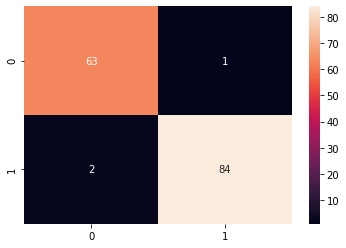

In [ ]:
cm = confusion_matrix(model3_pred, test_labels)
#print(cm)
sns.heatmap(cm, annot=True)

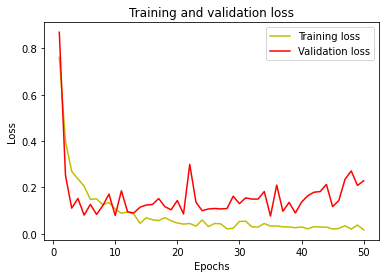

In [ ]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




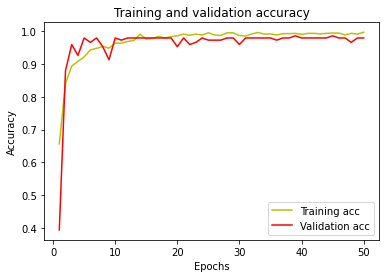

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()